In [1]:
#importing required libraries

import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing files

df = pd.read_csv('Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [22]:
#dropping 'e' column as it contains only 1 value
#axis = 0 indicates rows, 1 indicates column
#inplace: true changes original df and doesnt return new one. False returns a new df with specified rows/columns

df.drop(labels = 'e', axis = 1, inplace=True)

df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


In [24]:
#If there are lot of columns that are not required we can select only required columns :
modified_df = df[["lat","lng","zip","title","twp"]]
modified_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     663522 non-null  float64
 1   lng     663522 non-null  float64
 2   zip     583323 non-null  float64
 3   title   663522 non-null  object 
 4   twp     663229 non-null  object 
dtypes: float64(3), object(2)
memory usage: 25.3+ MB


In [3]:
#reading first 5 rows

df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
#checking for null values

print(df.isnull().sum())

#To drop null value rows, but here we are not dropping
#df.dropna()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64


# Top 5 zipcodes for 911 calls

In [5]:
df['zip'].value_counts().iloc[:5]

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

# Top 5 Townships for 911 calls

In [6]:
df['twp'].value_counts().iloc[:5]

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [37]:
#CHECKING COUNT OF UNIQUE REASONS IN TITLE COLUMN

df['title'].nunique()

148

# Top 5 emergency reasons for 911 calls

In [7]:
df['title'].value_counts().iloc[:5]

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: title, dtype: int64

In [8]:
#creating a new column "Reason" by splitting 'title' column

df['Reason']=df['title'].apply(lambda s:s.split(':')[1])
df['Reason'].head(10)


0         BACK PAINS/INJURY
1        DIABETIC EMERGENCY
2             GAS-ODOR/LEAK
3         CARDIAC EMERGENCY
4                 DIZZINESS
5               HEAD INJURY
6           NAUSEA/VOMITING
7     RESPIRATORY EMERGENCY
8          SYNCOPAL EPISODE
9        VEHICLE ACCIDENT -
Name: Reason, dtype: object

In [9]:
df['Department']=df['title'].apply(lambda s:s.split(':')[0])
df['Department'].head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   lat         663522 non-null  float64
 1   lng         663522 non-null  float64
 2   desc        663522 non-null  object 
 3   zip         583323 non-null  float64
 4   title       663522 non-null  object 
 5   timeStamp   663522 non-null  object 
 6   twp         663229 non-null  object 
 7   addr        663522 non-null  object 
 8   e           663522 non-null  int64  
 9   Reason      663522 non-null  object 
 10  Department  663522 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 55.7+ MB


# Top 5 Reasons and Departments for 911 calls

In [10]:
df['Reason'].value_counts().iloc[:5]



 VEHICLE ACCIDENT -    148372
 DISABLED VEHICLE -     47909
 FIRE ALARM             38452
 VEHICLE ACCIDENT       36377
 FALL VICTIM            34683
Name: Reason, dtype: int64

In [54]:
df['Department'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

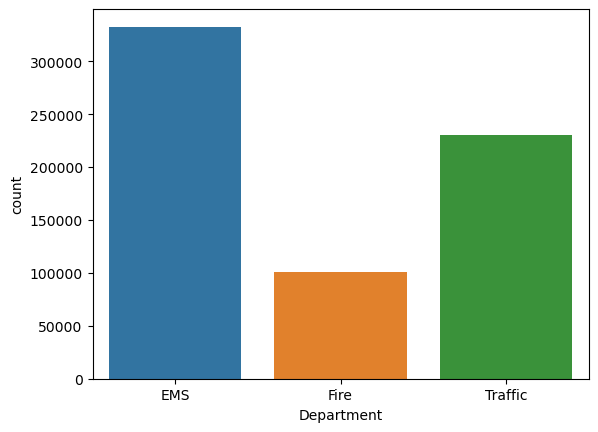

In [56]:
#creating visualizations

sns.countplot(x='Department', data=df)

In [62]:
type(df['timeStamp'].iloc[0])

str

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
time = df['timeStamp'].iloc[2]

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [18]:
df['Day of Week'] = df['Day of Week'].apply(lambda int:dmap[int])

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

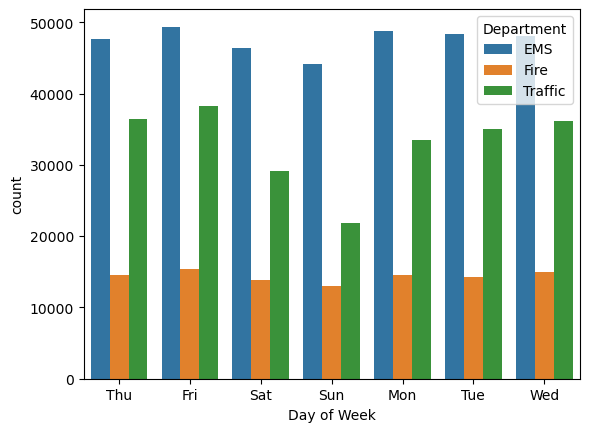

In [24]:
sns.countplot(x='Day of Week', hue='Department', data=df)
#plt.legend(bbox_to_anchor=(1,1))